<a href="https://colab.research.google.com/github/abhijiths1998/Capstone/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trip Pricing with Taxi Mobility Analytics

Matching the right cabs with the right customers quickly and efficiently

# Data and problem
We are predicting the surge price type for our company that is sigma cabs.
Previously surge price was given by service providers,from that information they have captured surgeprice type ,we are building a predictive model based on that surge price_type,so that they can fix the fare beforehand.

# column Descriptions
Trip_ID: ID for TRIP

Trip_Distance: The distance for the trip requested by the customer

TypeofCab: Category of the cab requested by the customer

CustomerSinceMonths: Customer using cab services since n months; 0 month means current month

LifeStyleIndex: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
                (Proprietary Index means a designated group of securities or instruments that (i) measures or represents the performance of a specific segment of the market for U.S.)

ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

Destination_Type: Sigma Cabs divides any destination in one of the 14 categories.

Customer_Rating: Average of life time ratings of the customer till date

CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes

Gender: Gender of the customer

SurgePricingType: Target (can be of 3 types)

# Lifecycle in the project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [ ]:
# importing math library
import numpy as np
import pandas as pd

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# to remove warnings
from warnings import filterwarnings
filterwarnings("ignore")


In [ ]:
# figsize constant for all figures
plt.rcParams["figure.figsize"]=[10,5]

In [ ]:
df=pd.read_csv(r"sigma_cabs.csv")

In [ ]:
# display the first five roes
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


# Total_Features

In [ ]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

# No of rows and columns

In [ ]:
df.shape

(131662, 14)

# Numerical Features

In [ ]:
num_features=df.select_dtypes(exclude="object")
num_features.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

# Categorical Features

In [ ]:
cat_features=df.select_dtypes(include="object")
cat_features.columns

Index(['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

In [ ]:
# meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [ ]:
df.nunique()

Trip_ID                        131662
Trip_Distance                   10326
Type_of_Cab                         5
Customer_Since_Months              11
Life_Style_Index                55978
Confidence_Life_Style_Index         3
Destination_Type                   14
Customer_Rating                  3931
Cancellation_Last_1Month            9
Var1                              122
Var2                               58
Var3                               96
Gender                              2
Surge_Pricing_Type                  3
dtype: int64

In [ ]:
df["Customer_Rating"].value_counts() # In feature engineering categorise the customer rating as 0,1,2,3,4,5

2.75000    122
3.50000    120
3.35000    116
2.60000    112
3.20000    109
          ... 
4.94875      1
0.14500      1
0.12375      1
0.60500      1
0.03125      1
Name: Customer_Rating, Length: 3931, dtype: int64

In [ ]:
df["Customer_Since_Months"]=df["Customer_Since_Months"].astype('object')

In [ ]:
df["Cancellation_Last_1Month"]=df["Cancellation_Last_1Month"].astype('object')

In [ ]:
df["Surge_Pricing_Type"]=df["Surge_Pricing_Type"].astype('object')

In [ ]:
# df["Customer_Rating"]=df["Customer_Rating"].astype('object')

In [ ]:
# Five point summary statsistics
df.describe()

,Trip_Distance,Life_Style_Index,Customer_Rating,Var1,Var2,Var3
count,131662.000000,111469.000000,131662.000000,60632.000000,131662.000000,131662.000000
mean,44.200909,2.802064,2.849458,64.202698,51.202800,75.099019
std,25.522882,0.225796,0.980675,21.820447,4.986142,11.578278
min,0.310000,1.596380,0.001250,30.000000,40.000000,52.000000
25%,24.580000,2.654730,2.152500,46.000000,48.000000,67.000000
50%,38.200000,2.798050,2.895000,61.000000,50.000000,74.000000
75%,60.730000,2.946780,3.582500,80.000000,54.000000,82.000000
max,109.230000,4.875110,5.000000,210.000000,124.000000,206.000000


In [ ]:
df.describe(include="object")

,Trip_ID,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Cancellation_Last_1Month,Gender,Surge_Pricing_Type
count,131662,111452,125742.0,111469,131662,131662,131662,131662
unique,131662,5,11.0,3,14,9,2,3
top,T0005741125,B,10.0,B,A,0,Male,2
freq,1,31136,42680.0,40355,77597,68687,93900,56728


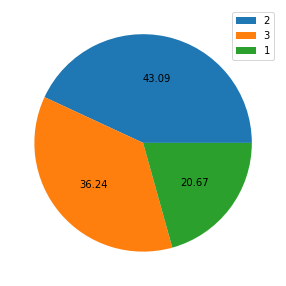

In [ ]:
# to check imbalance
plt.pie(df["Surge_Pricing_Type"].value_counts(),autopct="%.2f")
labels=df["Surge_Pricing_Type"].unique()
plt.legend(labels,loc="upper right")
plt.show()

 TARGET IS IMBALALNCED # We can treat this later

# Data Analysis we wil Analyze to find out the below stuff
1. Missing values
2. All the numerical features
3. Distribution of Numerical features
4. Categorical features
5. Cardiability of categorical features
6. Outliers
7. Relationship between independent and dependent features(Surge_Pricing_Type)

# Missing value Treatment

In [ ]:
Missing_values=df.isnull().sum()[df.isnull().sum()>0]
Missing_values

Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Var1                           71030
dtype: int64

In [ ]:
Percent_missing=(Missing_values/df.shape[0])*100
Percent_missing

Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Var1                           53.948748
dtype: float64

In [ ]:
df_null=pd.DataFrame({"Missing_values":Missing_values,"Percent_missing":Percent_missing})
df_null

,Missing_values,Percent_missing
Type_of_Cab,20210,15.349911
Customer_Since_Months,5920,4.496362
Life_Style_Index,20193,15.336999
Confidence_Life_Style_Index,20193,15.336999
Var1,71030,53.948748


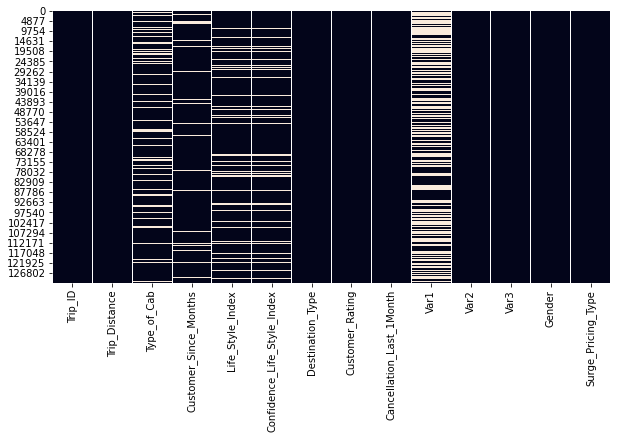

In [ ]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [ ]:
# Treating missing values 
# numerical _features- plot the distplot and verfy if skewed replace nan values by median or do mean replacement
# categorical features - verify the frequency and replace with max frequency

In [ ]:
# check skewness and treat missing numeric values
num_features=df.select_dtypes(exclude="object")
num_features.columns

Index(['Trip_Distance', 'Life_Style_Index', 'Customer_Rating', 'Var1', 'Var2',
       'Var3'],
      dtype='object')

In [ ]:
df.skew()

Trip_Distance               0.723752
Customer_Since_Months      -0.246954
Life_Style_Index            0.193994
Customer_Rating            -0.191131
Cancellation_Last_1Month    1.550869
Var1                        0.465401
Var2                        1.184634
Var3                        0.828977
Surge_Pricing_Type         -0.255149
dtype: float64

In [ ]:
# Type of cab ,Confidence_Life_Style_Index,Customer_Since_Months check value counts and replace by max frequency value

In [ ]:
# Life style index is 0.21 so normal distribution so treat with mean

In [ ]:
df["Life_Style_Index"]=df["Life_Style_Index"].replace(np.nan,df["Life_Style_Index"].mean())

In [ ]:
df["Type_of_Cab"].value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [ ]:
# In Type of cab most of them are travelled in Type B cab so replaced with B .

In [ ]:
df["Type_of_Cab"]=df["Type_of_Cab"].replace(np.nan,'B')

In [ ]:
df["Customer_Since_Months"].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

In [ ]:
# customer since months treating nan values by 10 since they are max frequency.

In [ ]:
df["Customer_Since_Months"]=df["Customer_Since_Months"].replace(np.nan,10)

In [ ]:
df["Confidence_Life_Style_Index"].value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [ ]:
# confidence_life_style_index replaced by B they are max_frequency

In [ ]:
df["Confidence_Life_Style_Index"]=df["Confidence_Life_Style_Index"].replace(np.nan,'B')

In [ ]:
# var1 -53 % null values so dropping

In [ ]:
df=df.drop(["Var1"],axis=1)

In [ ]:
# Dropping Redundant features with is insignificant with target

In [ ]:
df=df.drop(["Trip_ID"],axis=1)

In [ ]:
df["Surge_Pricing_Type"].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

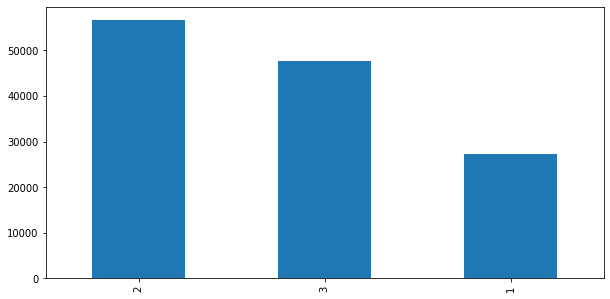

In [ ]:
df["Surge_Pricing_Type"].value_counts().plot(kind='bar')

In [ ]:
# check missing values treated

In [ ]:
Missing_values=df.isnull().sum()[df.isnull().sum()>0]
Missing_values

Series([], dtype: int64)

In [ ]:
# visualization of null values

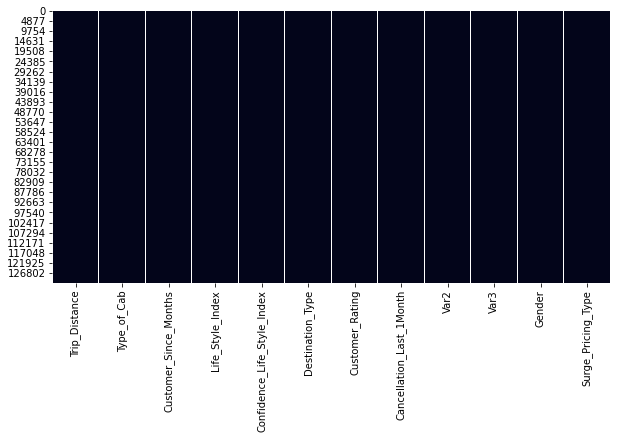

In [ ]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [ ]:
# check skewness and treat missing numeric values
num_features=df.select_dtypes(exclude="object")
num_features.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Var2', 'Var3'],
      dtype='object')

# Distribution of Numerical Features

In [ ]:
# Distribution comparision of numerical features based on surge pricing type classes using distribution plot in Facet grid

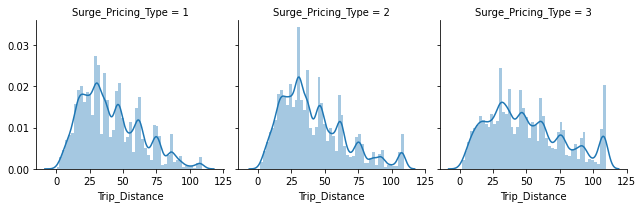

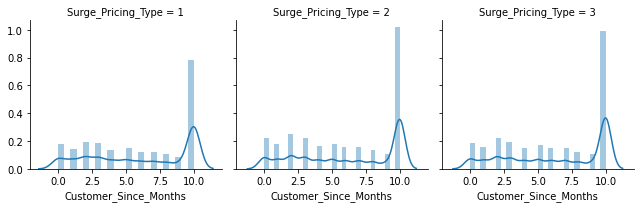

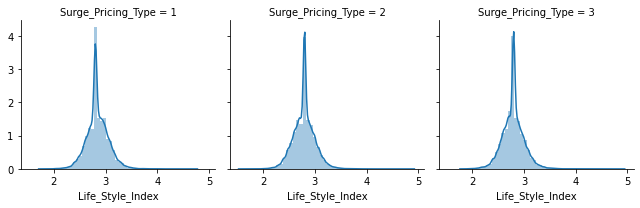

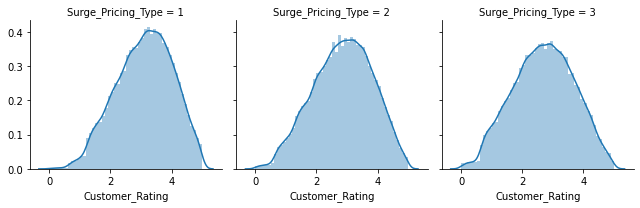

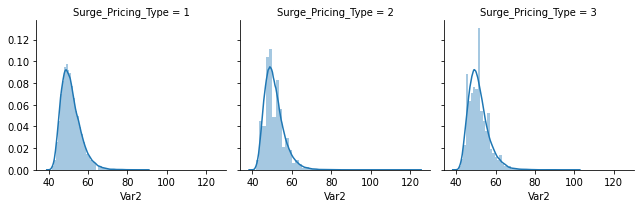

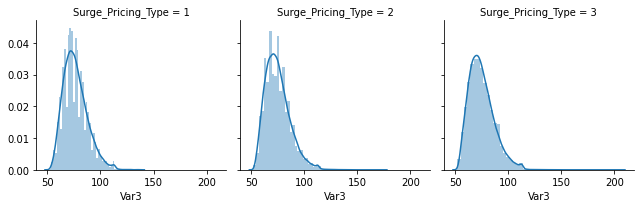

In [ ]:
for i in num_features.columns:
    a = sns.FacetGrid(df, col='Surge_Pricing_Type')
    a.map(sns.distplot,i)
    plt.show()

# Cardiability of categorical features

In [ ]:
cat_features=df.select_dtypes(include="object")
cat_features.columns

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Cancellation_Last_1Month', 'Gender', 'Surge_Pricing_Type'],
      dtype='object')

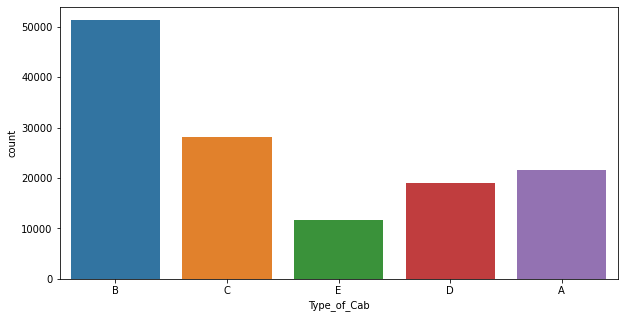

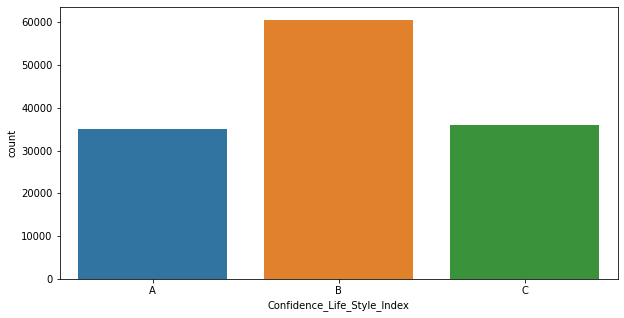

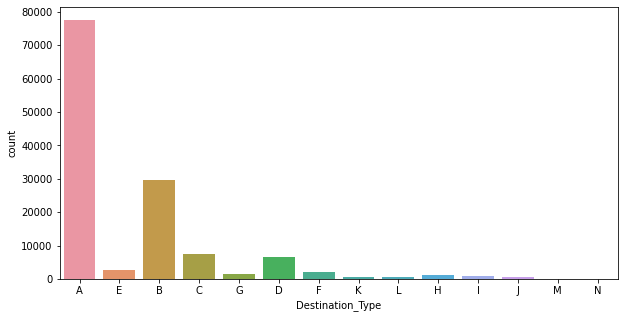

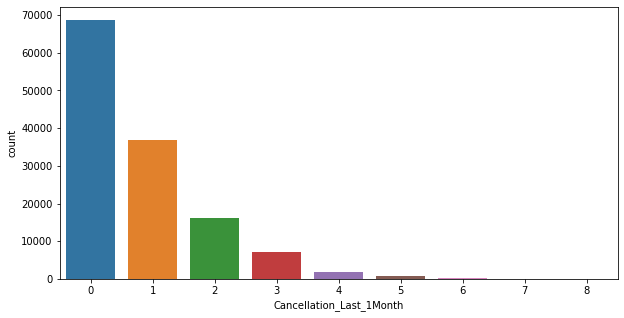

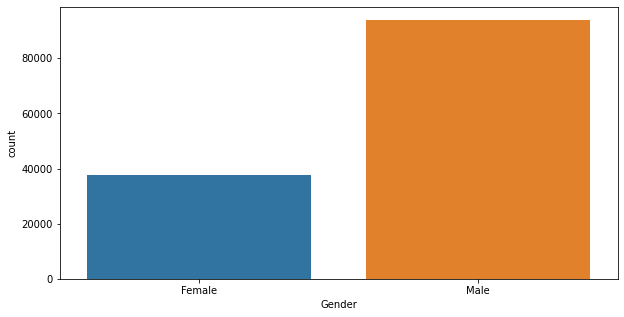

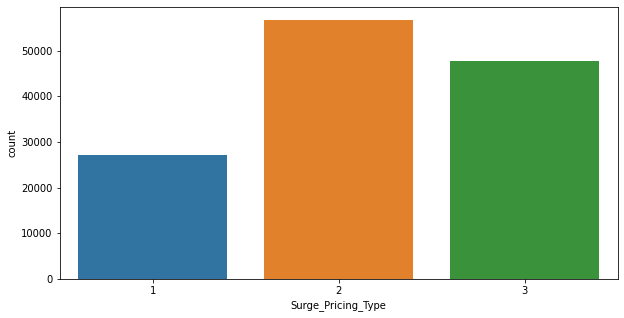

In [ ]:
# visualization using countplot for categorical  
for i in cat_features.columns:
    sns.countplot(df[i])
    plt.show()

# Outliers

skewnwss of Trip_Distance is 0.7237521953811848


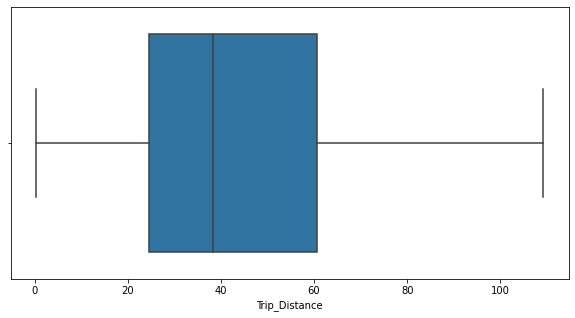

skewnwss of Customer_Since_Months is -0.3222561661169976


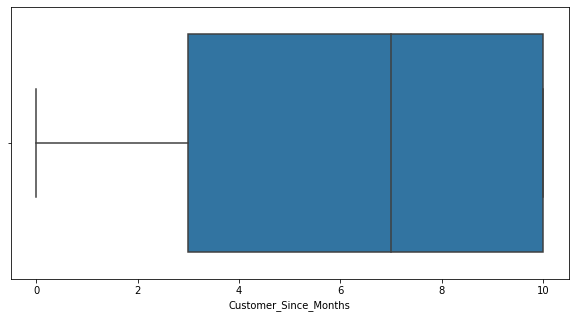

skewnwss of Life_Style_Index is 0.21083409484923255


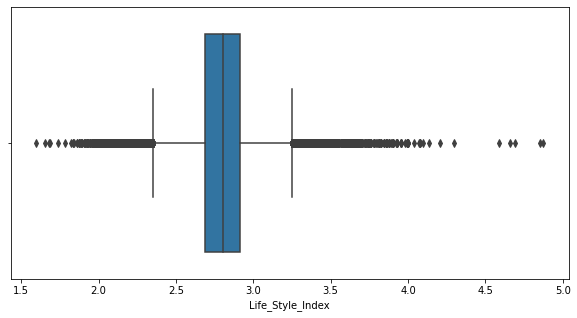

skewnwss of Customer_Rating is -0.1911305870329428


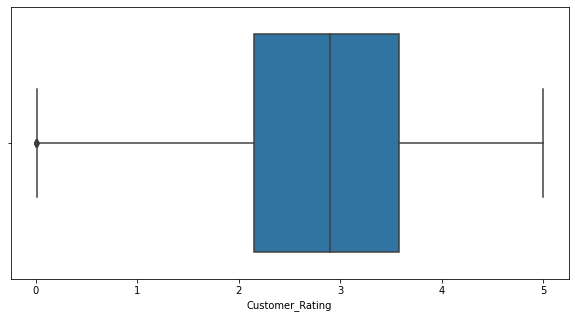

skewnwss of Var2 is 1.1846339188275112


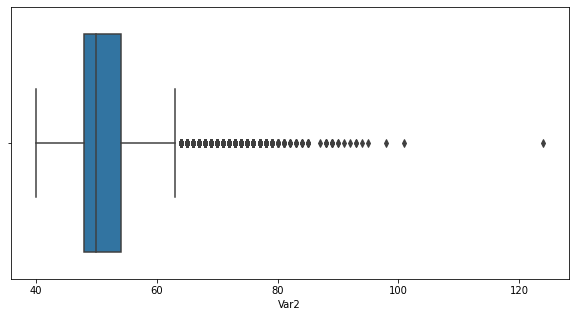

skewnwss of Var3 is 0.8289765810094026


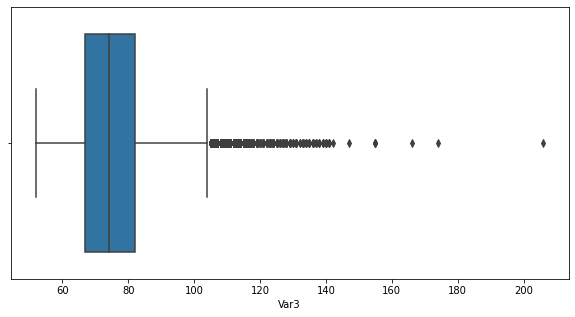

In [ ]:
# visualize the outliers using boxplot
for i in num_features.columns:
    sns.boxplot(df[i],)
    print('skewnwss of',i,'is',df[i].skew())
    plt.show()

In [ ]:
df["Surge_Pricing_Type"]=df["Surge_Pricing_Type"].astype(object)

# Relationship between independent and dependent features(Surge_Pricing_Type)

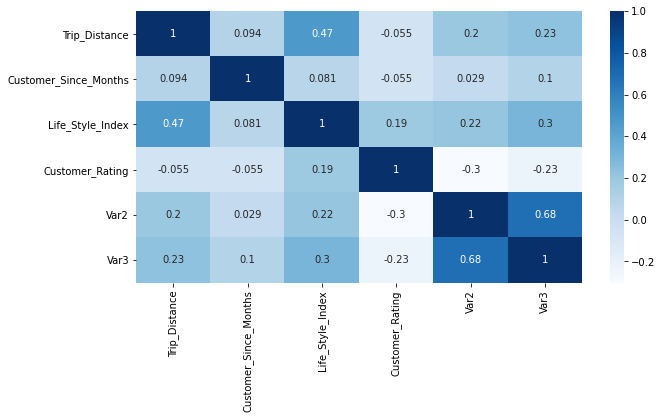

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

# Bivariant Analysis

In [ ]:
# Quartile comparison of each numerical features based on target classes

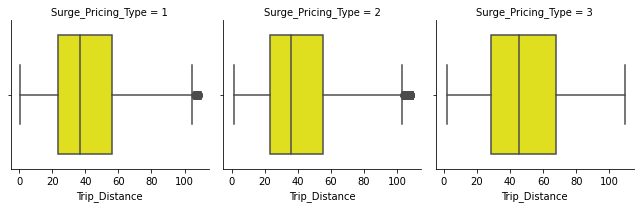

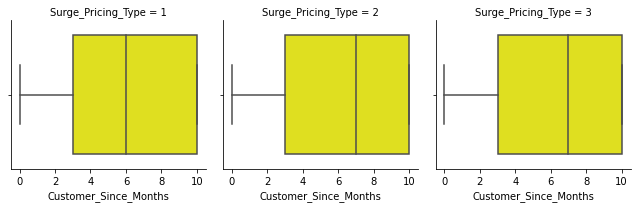

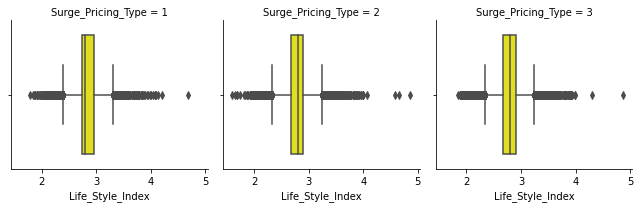

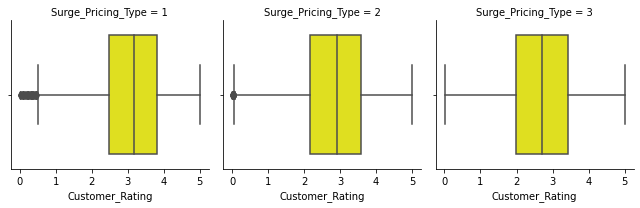

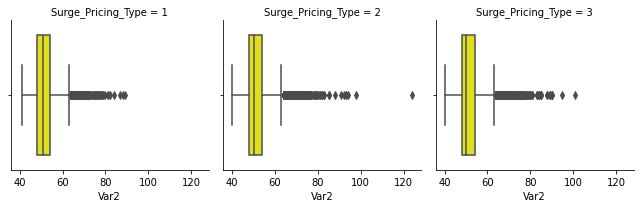

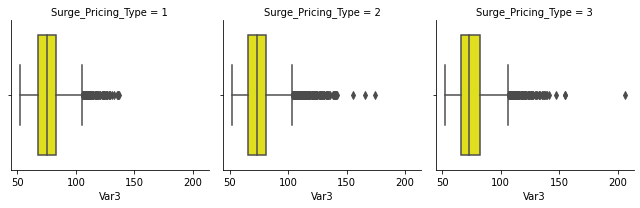

In [ ]:
for i in num_features.columns:
    a = sns.FacetGrid(df, col='Surge_Pricing_Type')
    a.map(sns.boxplot, i, color='yellow', order=['1', '2', '3'])


In [ ]:
# comparing relation of trip distance and life_style_index

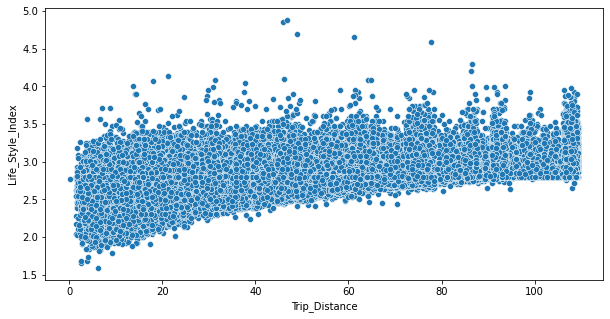

In [ ]:
sns.scatterplot(df['Trip_Distance'],df["Life_Style_Index"])
plt.show()

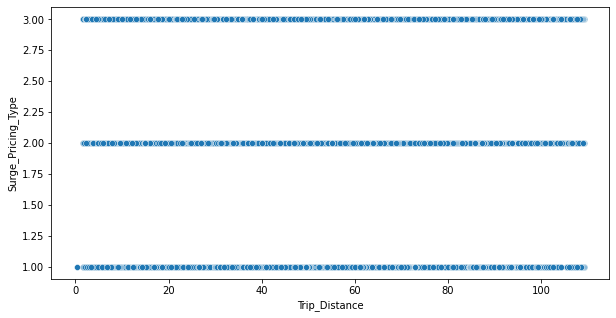

In [ ]:
sns.scatterplot(df['Trip_Distance'],df["Surge_Pricing_Type"])
plt.show()

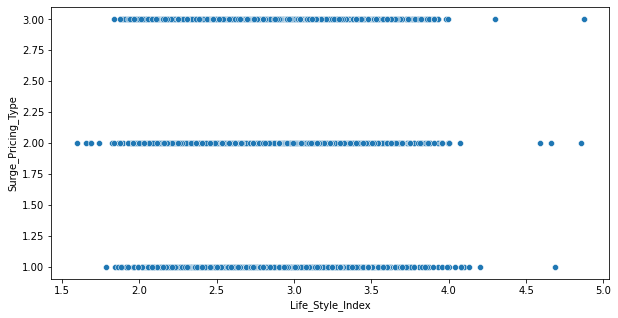

In [ ]:
sns.scatterplot(df["Life_Style_Index"],df["Surge_Pricing_Type"])
plt.show()

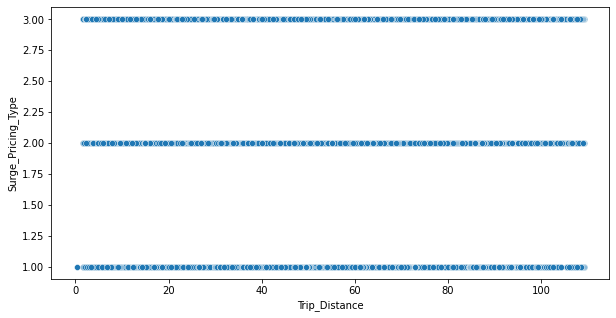

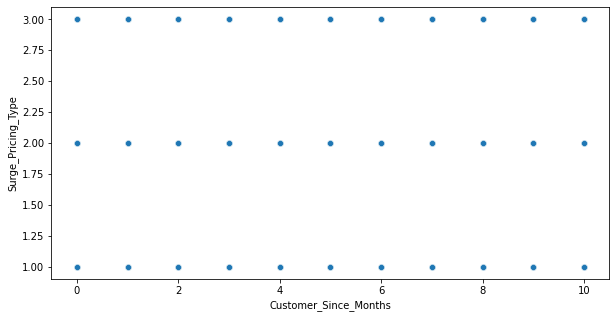

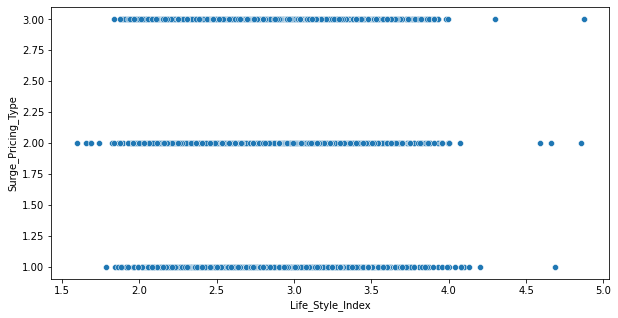

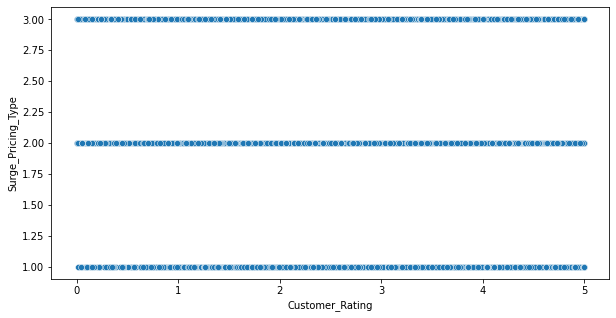

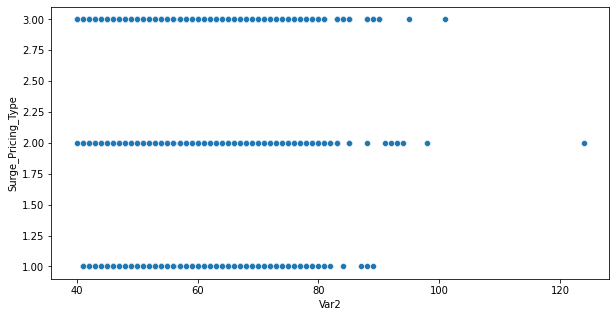

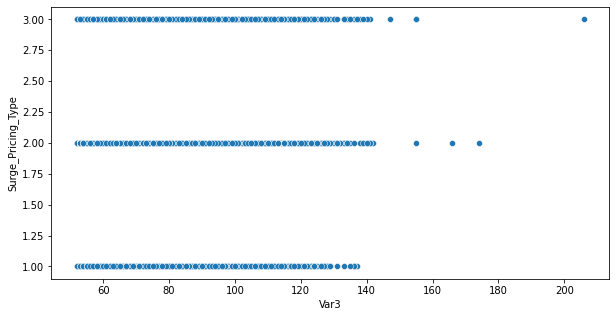

In [ ]:
for i in num_features.columns:
    sns.scatterplot(df[i],df["Surge_Pricing_Type"])
    plt.show()

In [ ]:
pd.crosstab(df['Type_of_Cab'],df["Surge_Pricing_Type"])

Surge_Pricing_Type,1,2,3
Type_of_Cab,,,
A,14916,2258,4395
B,9123,32497,9726
C,1037,17290,9795
D,1065,2511,15415
E,1073,2172,8389


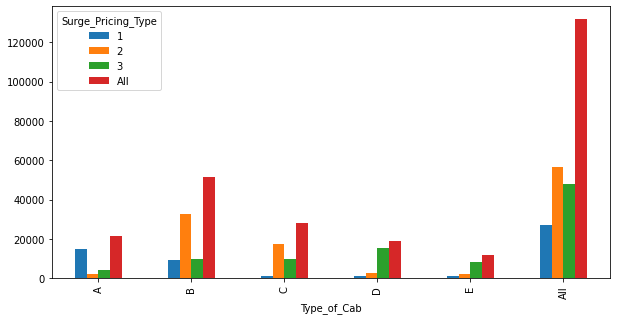

In [ ]:
pd.crosstab(df['Type_of_Cab'],df["Surge_Pricing_Type"],margins=True).plot(kind="bar")
plt.show()

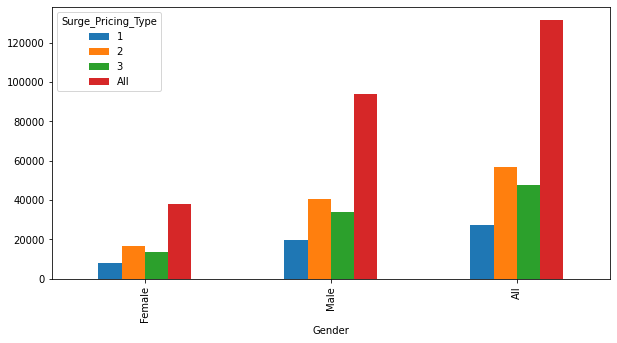

In [ ]:
pd.crosstab(df['Gender'],df["Surge_Pricing_Type"],margins=True).plot(kind="bar")
plt.show()

# MULTI VARIANT ANALYSIS

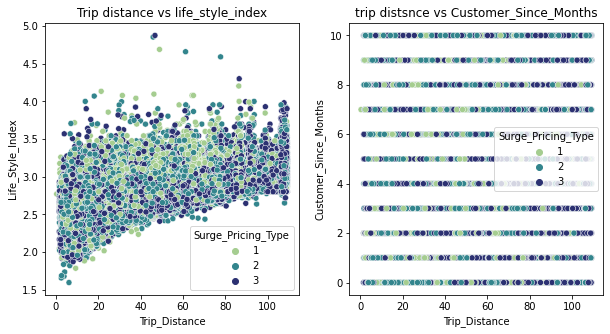

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2)

ax1=plt.subplot(1,2,1)
plt.title("Trip distance vs life_style_index")
sns.scatterplot(y="Life_Style_Index",x="Trip_Distance",hue="Surge_Pricing_Type",data=df,ax=ax1,palette='crest')


ax2=plt.subplot(1,2,2)
plt.title("trip distsnce vs Customer_Since_Months")
sns.scatterplot(y="Customer_Since_Months",x="Trip_Distance",hue="Surge_Pricing_Type",data=df,ax=ax2,palette='crest')
plt.show()

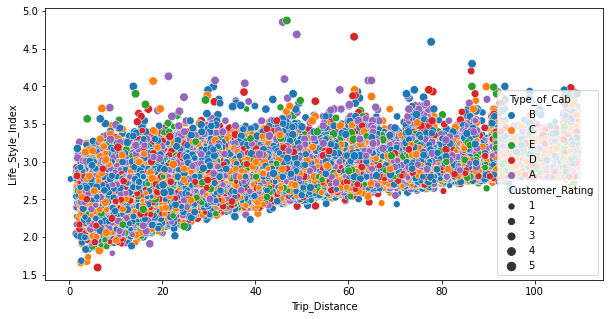

In [ ]:
sns.scatterplot(data=df,x="Trip_Distance",y='Life_Style_Index',hue="Type_of_Cab",size='Customer_Rating')
plt.show()

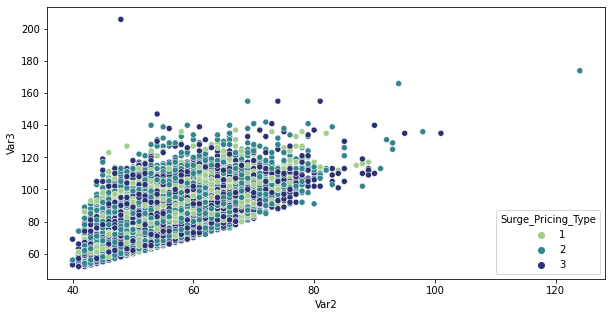

In [ ]:
sns.scatterplot(data = df, x = 'Var2'  , y= 'Var3',hue = 'Surge_Pricing_Type',palette='crest')
plt.show()

In [ ]:
# most of the data points are in similar range in target variables

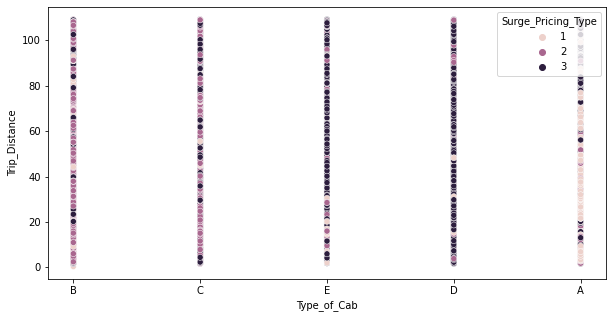

In [ ]:
sns.scatterplot(data=df,y="Trip_Distance",x='Type_of_Cab',hue="Surge_Pricing_Type")
plt.show()

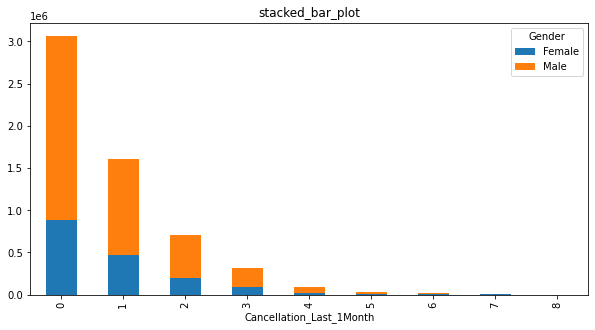

In [ ]:
stack=pd.pivot_table(df,index=['Cancellation_Last_1Month'],columns=['Gender'],values="Trip_Distance",aggfunc="sum")
stack.plot.bar(title="stacked_bar_plot",stacked=True)
plt.show()

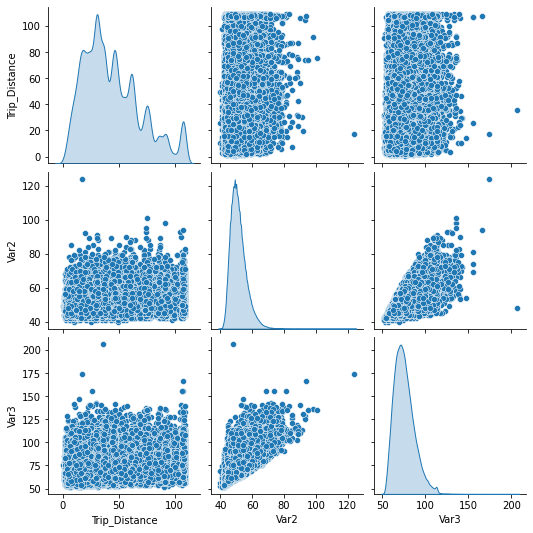

In [ ]:
sns.pairplot(data = df , vars=['Trip_Distance', 'Var2', 'Var3'] , palette='husl',diag_kind='kde')

In [ ]:
# There is no defenite corelation

## **STATISTICAL TEST**

95% confidence level

Pval<0.05

"Ha is accepted"

TRIP_DISTANCE,LIFE_STYLE_INDEX,CUSTOMER_RATING,VAR2,VAR3 ARE SIGNIFICANT 
WITH TARGET SURGE_TYPE_PRICING
CHI SQUARE TEST FOR INDEPENDNCE - Target and categorical variable

HYPOTHESIS:

Ho : Independent (NO relation)

Ha : Not independent (Relation)


In [ ]:
import scipy.stats as stats

In [ ]:
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.427690,A,A,3.90500,0,46,60,Female,2
1,29.47,B,10.0,2.782450,B,A,3.45000,0,56,78,Male,2
2,41.58,B,10.0,2.802064,B,E,3.50125,2,56,77,Male,2
3,61.56,C,10.0,2.802064,B,A,3.45375,0,52,74,Male,3
4,54.95,C,10.0,3.034530,B,A,3.40250,4,49,102,Male,2


In [ ]:
def hyp_testing(pval,sig_lvl):
    if pval > sig_lvl:
        return 'Ho is accepted'
        
    elif pval < sig_lvl:
        return 'Ha is accepted'

In [ ]:
for i in cat_features.columns:
    for j in cat_features:
        if i != j and j == 'Surge_Pricing_Type':
            obs = pd.crosstab(df[i],df[j])
            chi_stat,pval,ddof,expected = stats.chi2_contingency(obs)
            print('Pvalue of Chi-Square test between : \n  ',i,' and ',j,'is',pval,end='\n')
            if hyp_testing(pval,0.05) == 'Ho is accepted':
                print('There is no association between ',i,' and ',j)
            elif hyp_testing(pval,0.05) == 'Ha is accepted':
                    print('There is association between',i,' and ',j)     
            print()

Pvalue of Chi-Square test between : 
   Type_of_Cab  and  Surge_Pricing_Type is 0.0
There is association between Type_of_Cab  and  Surge_Pricing_Type

Pvalue of Chi-Square test between : 
   Confidence_Life_Style_Index  and  Surge_Pricing_Type is 0.0
There is association between Confidence_Life_Style_Index  and  Surge_Pricing_Type

Pvalue of Chi-Square test between : 
   Destination_Type  and  Surge_Pricing_Type is 0.0
There is association between Destination_Type  and  Surge_Pricing_Type

Pvalue of Chi-Square test between : 
   Cancellation_Last_1Month  and  Surge_Pricing_Type is 0.0
There is association between Cancellation_Last_1Month  and  Surge_Pricing_Type

Pvalue of Chi-Square test between : 
   Gender  and  Surge_Pricing_Type is 0.26289162562835167
There is no association between  Gender  and  Surge_Pricing_Type



1639.1968131185392 0.0
Ha is accepted


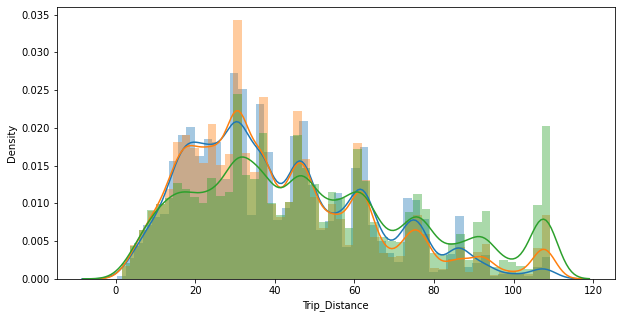

In [ ]:
surge_1=df[df['Surge_Pricing_Type']==1]["Trip_Distance"]
surge_2=df[df['Surge_Pricing_Type']==2]["Trip_Distance"]
surge_3=df[df['Surge_Pricing_Type']==3]["Trip_Distance"]

fstat,pval = stats.f_oneway(surge_1,surge_2,surge_3)
print(fstat,pval)

if pval >0.05:
  print("H0 is accepted")
else:
  print("Ha is accepted")

sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

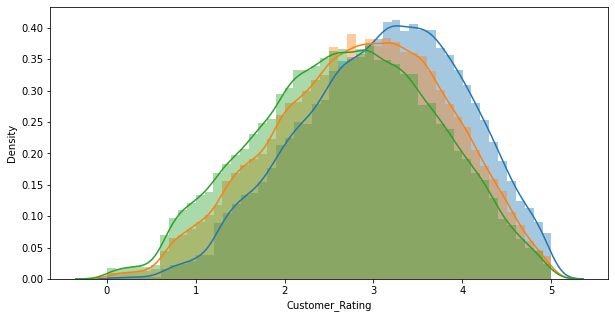

In [ ]:
surge_1=df[df['Surge_Pricing_Type']==1]["Customer_Rating"]
surge_2=df[df['Surge_Pricing_Type']==2]["Customer_Rating"]
surge_3=df[df['Surge_Pricing_Type']==3]["Customer_Rating"]

sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

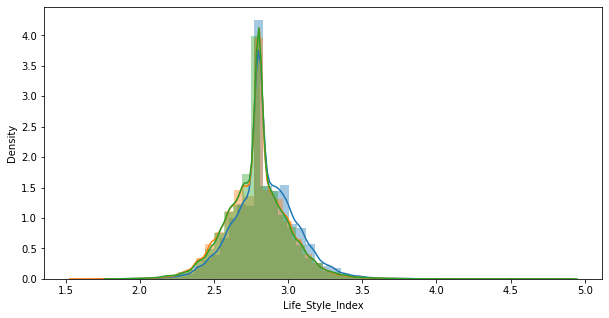

In [ ]:
surge_1=df[df['Surge_Pricing_Type']==1]["Life_Style_Index"]
surge_2=df[df['Surge_Pricing_Type']==2]["Life_Style_Index"]
surge_3=df[df['Surge_Pricing_Type']==3]["Life_Style_Index"]

sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

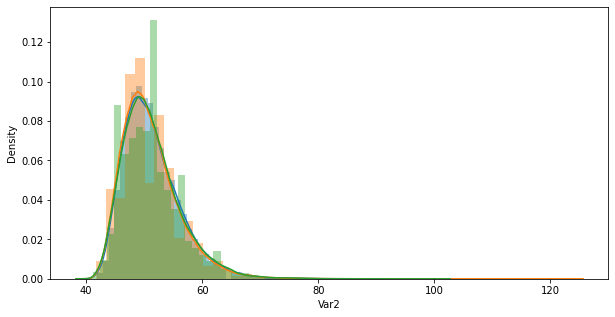

In [ ]:
surge_1=df[df['Surge_Pricing_Type']==1]["Var2"]
surge_2=df[df['Surge_Pricing_Type']==2]["Var2"]
surge_3=df[df['Surge_Pricing_Type']==3]["Var2"]

sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

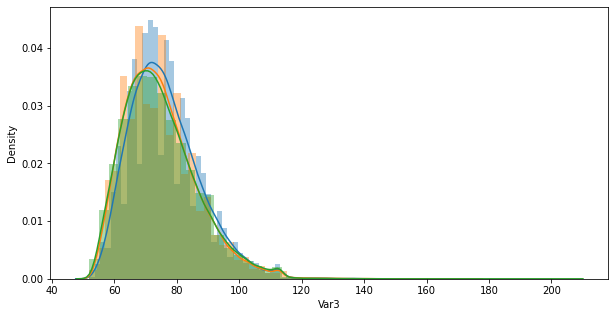

In [ ]:
surge_1=df[df['Surge_Pricing_Type']==1]["Var3"]
surge_2=df[df['Surge_Pricing_Type']==2]["Var3"]
surge_3=df[df['Surge_Pricing_Type']==3]["Var3"]

sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)

In [ ]:
# As we can see there is no association between gender and target feature 
# Hence we are going to remove gender feature
df = df.drop('Gender',axis=1)

# Tableau EDA work and inference:

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# SURGE TYPE 1

In [ ]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [ ]:
surge_1=df[df["Surge_Pricing_Type"]==1]
surge_1.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
13,31.16,B,10.0,2.69170,B,A,2.14750,0,53,90,1
17,14.12,D,3.0,2.97795,B,G,4.93375,0,47,64,1
20,72.54,C,0.0,3.06236,C,A,2.08250,0,52,89,1
25,16.78,B,1.0,2.70013,A,A,1.61250,3,52,85,1
27,18.47,A,9.0,2.77751,B,A,1.44000,5,55,85,1


In [ ]:
surge_1["Trip_Distance"].sum()

1117451.29

In [ ]:
surge_1["Trip_Distance"].median()

36.685

In [ ]:
surge_2=df[df["Surge_Pricing_Type"]==2]
surge_2.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
0,6.77,B,1.0,2.427690,A,A,3.90500,0,46,60,2
1,29.47,B,10.0,2.782450,B,A,3.45000,0,56,78,2
2,41.58,B,10.0,2.802064,B,E,3.50125,2,56,77,2
4,54.95,C,10.0,3.034530,B,A,3.40250,4,49,102,2
6,29.72,E,10.0,2.839580,C,B,2.97500,1,50,75,2


In [ ]:
surge_2["Trip_Distance"].std()

23.894454181947097

In [ ]:
surge_3=df[df["Surge_Pricing_Type"]==3]
surge_3.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
3,61.56,C,10.0,2.802064,B,A,3.45375,0,52,74,3
5,19.06,E,10.0,2.802064,B,A,2.59750,1,63,91,3
9,107.19,D,5.0,3.044670,B,A,2.44375,1,58,83,3
16,56.83,E,4.0,2.661500,B,A,1.39625,0,47,80,3
19,81.70,A,0.0,2.823070,B,D,2.79750,5,51,80,3


In [ ]:
surge_1.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Var2,Var3
count,27214.000000,27214.000000,27214.000000,27214.000000,27214.000000,27214.000000
mean,41.061633,6.071140,2.840574,3.112791,51.316785,76.252223
std,22.437245,3.658814,0.209661,0.915237,4.948862,11.256905
min,0.310000,0.000000,1.786040,0.010000,41.000000,52.000000
25%,23.560000,3.000000,2.730748,2.475000,48.000000,68.000000
50%,36.685000,6.000000,2.802064,3.171250,51.000000,75.000000
75%,56.100000,10.000000,2.958117,3.800000,54.000000,83.000000
max,109.220000,10.000000,4.690120,5.000000,89.000000,137.000000


In [ ]:
surge_2.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Var2,Var3
count,56728.000000,56728.000000,56728.000000,56728.000000,56728.000000,56728.000000
mean,41.269265,6.138644,2.791342,2.857688,51.064078,74.772299
std,23.894454,3.651128,0.205665,0.969204,4.930769,11.523530
min,1.590000,0.000000,1.596380,0.002500,40.000000,52.000000
25%,23.380000,3.000000,2.672367,2.172500,48.000000,66.000000
50%,36.170000,7.000000,2.802064,2.905000,50.000000,73.000000
75%,55.330000,10.000000,2.902703,3.579063,54.000000,81.000000
max,109.230000,10.000000,4.853780,5.000000,124.000000,174.000000


In [ ]:
surge_3.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Var2,Var3
count,47720.000000,47720.000000,47720.000000,47720.000000,47720.000000,47720.000000
mean,49.476234,6.334744,2.792849,2.689500,51.302703,74.829757
std,28.068398,3.609495,0.206582,0.996941,5.068173,11.781039
min,1.540000,0.000000,1.835630,0.001250,40.000000,52.000000
25%,28.310000,3.000000,2.677192,1.981250,48.000000,66.000000
50%,45.520000,7.000000,2.802064,2.711250,50.000000,73.000000
75%,67.870000,10.000000,2.900950,3.425000,54.000000,82.000000
max,109.230000,10.000000,4.875110,5.000000,101.000000,206.000000


# Handling Non Numerical data
N-1 dummy encoding

In [ ]:
df1=df.copy()
df1.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
0,6.77,B,1.0,2.427690,A,A,3.90500,0,46,60,2
1,29.47,B,10.0,2.782450,B,A,3.45000,0,56,78,2
2,41.58,B,10.0,2.802064,B,E,3.50125,2,56,77,2
3,61.56,C,10.0,2.802064,B,A,3.45375,0,52,74,3
4,54.95,C,10.0,3.034530,B,A,3.40250,4,49,102,2


In [ ]:
df2=df1.iloc[:,:-1]
df2.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3
0,6.77,B,1.0,2.427690,A,A,3.90500,0,46,60
1,29.47,B,10.0,2.782450,B,A,3.45000,0,56,78
2,41.58,B,10.0,2.802064,B,E,3.50125,2,56,77
3,61.56,C,10.0,2.802064,B,A,3.45375,0,52,74
4,54.95,C,10.0,3.034530,B,A,3.40250,4,49,102


In [ ]:
df2.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3
0,6.77,B,1.0,2.427690,A,A,3.90500,0,46,60
1,29.47,B,10.0,2.782450,B,A,3.45000,0,56,78
2,41.58,B,10.0,2.802064,B,E,3.50125,2,56,77
3,61.56,C,10.0,2.802064,B,A,3.45375,0,52,74
4,54.95,C,10.0,3.034530,B,A,3.40250,4,49,102


In [ ]:
df2_new=pd.get_dummies(df2,columns=["Type_of_Cab","Confidence_Life_Style_Index","Destination_Type"],drop_first=True)
df2_new.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N
0,6.77,1.0,2.427690,3.90500,0,46,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.782450,3.45000,0,56,78,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,41.58,10.0,2.802064,3.50125,2,56,77,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,61.56,10.0,2.802064,3.45375,0,52,74,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54.95,10.0,3.034530,3.40250,4,49,102,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df["Surge_Pricing_Type"]

In [ ]:
df2_new.shape

(131662, 26)

In [ ]:
y.shape

(131662,)

# **SMOTE_OVERSAMPLING "1" 27700 TO 45000 - IMBALANCED DATA**

In [ ]:
strategy = {1:45000,2:56728,3:47720}

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(sampling_strategy=strategy,random_state=10)
x_sm,y_sm=sm.fit_sample(df2_new,y)

In [ ]:
df_sm = pd.DataFrame(x_sm,columns=df2_new.columns)
df_sm['y']=y_sm
df_sm.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,y
0,6.77,1.0,2.427690,3.90500,0.0,46.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,29.47,10.0,2.782450,3.45000,0.0,56.0,78.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,41.58,10.0,2.802064,3.50125,2.0,56.0,77.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,61.56,10.0,2.802064,3.45375,0.0,52.0,74.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,54.95,10.0,3.034530,3.40250,4.0,49.0,102.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
df_sm.shape

(149448, 27)

In [ ]:
df_sm["y"].value_counts()

2    56728
3    47720
1    45000
Name: y, dtype: int64

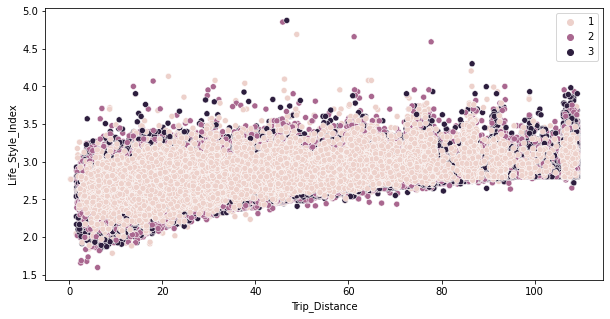

In [ ]:
sns.scatterplot(x='Trip_Distance',y='Life_Style_Index',data=df_sm,hue=list(df_sm['y']))
plt.show()

In [ ]:
category=df_sm.drop(["Trip_Distance","Life_Style_Index","Customer_Rating","Var2","Var3"],axis=1)
category.head()

,Customer_Since_Months,Cancellation_Last_1Month,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,y
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,10.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,10.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,10.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


# Scaling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
num=pd.DataFrame(ss.fit_transform(df_sm[["Trip_Distance","Life_Style_Index","Customer_Rating","Var2","Var3"]]),columns=
                ["Trip_Distance","Life_Style_Index","Customer_Rating","Var2","Var3"])
num.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Var2,Var3
0,-1.471819,-1.847538,1.060775,-1.051128,-1.321264
1,-0.570483,-0.117217,0.589328,0.962064,0.238152
2,-0.089638,-0.021551,0.642431,0.962064,0.151517
3,0.703697,-0.021551,0.593214,0.156787,-0.108385
4,0.441238,1.112289,0.540111,-0.447170,2.317373


In [ ]:
df_scaled=pd.concat([num,category],axis=1)
df_scaled.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Var2,Var3,Customer_Since_Months,Cancellation_Last_1Month,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,y
0,-1.471819,-1.847538,1.060775,-1.051128,-1.321264,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,-0.570483,-0.117217,0.589328,0.962064,0.238152,10.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,-0.089638,-0.021551,0.642431,0.962064,0.151517,10.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.703697,-0.021551,0.593214,0.156787,-0.108385,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.441238,1.112289,0.540111,-0.447170,2.317373,10.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
df_scaled.shape

(149448, 27)

In [ ]:
df_scaled.columns

Index(['Trip_Distance', 'Life_Style_Index', 'Customer_Rating', 'Var2', 'Var3',
       'Customer_Since_Months', 'Cancellation_Last_1Month', 'Type_of_Cab_B',
       'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Destination_Type_B', 'Destination_Type_C', 'Destination_Type_D',
       'Destination_Type_E', 'Destination_Type_F', 'Destination_Type_G',
       'Destination_Type_H', 'Destination_Type_I', 'Destination_Type_J',
       'Destination_Type_K', 'Destination_Type_L', 'Destination_Type_M',
       'Destination_Type_N', 'y'],
      dtype='object')

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149448 entries, 0 to 149447
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  149448 non-null  float64
 1   Life_Style_Index               149448 non-null  float64
 2   Customer_Rating                149448 non-null  float64
 3   Var2                           149448 non-null  float64
 4   Var3                           149448 non-null  float64
 5   Customer_Since_Months          149448 non-null  float64
 6   Cancellation_Last_1Month       149448 non-null  float64
 7   Type_of_Cab_B                  149448 non-null  float64
 8   Type_of_Cab_C                  149448 non-null  float64
 9   Type_of_Cab_D                  149448 non-null  float64
 10  Type_of_Cab_E                  149448 non-null  float64
 11  Confidence_Life_Style_Index_B  149448 non-null  float64
 12  Confidence_Life_Style_Index_C 

In [ ]:
df_scaled.isnull().sum()

Trip_Distance                    0
Life_Style_Index                 0
Customer_Rating                  0
Var2                             0
Var3                             0
Customer_Since_Months            0
Cancellation_Last_1Month         0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_D                    0
Type_of_Cab_E                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Destination_Type_L               0
Destination_Type_M               0
Destination_Type_N               0
y                                0
dtype: int64

In [ ]:
df_scaled["y"]=df_scaled["y"].astype(int)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier,VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix,r2_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score                                      

In [ ]:
df["Cancellation_Last_1Month"]=df["Cancellation_Last_1Month"].astype(int)

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149448 entries, 0 to 149447
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Trip_Distance                  149448 non-null  float64
 1   Life_Style_Index               149448 non-null  float64
 2   Customer_Rating                149448 non-null  float64
 3   Var2                           149448 non-null  float64
 4   Var3                           149448 non-null  float64
 5   Customer_Since_Months          149448 non-null  float64
 6   Cancellation_Last_1Month       149448 non-null  float64
 7   Type_of_Cab_B                  149448 non-null  float64
 8   Type_of_Cab_C                  149448 non-null  float64
 9   Type_of_Cab_D                  149448 non-null  float64
 10  Type_of_Cab_E                  149448 non-null  float64
 11  Confidence_Life_Style_Index_B  149448 non-null  float64
 12  Confidence_Life_Style_Index_C 

In [ ]:
x=df_scaled.drop(["y"],axis=1)
y=df_scaled["y"]

In [ ]:
x.shape

(149448, 26)

In [ ]:
y.shape

(149448,)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(119558, 26)
(29890, 26)
(119558,)
(29890,)


In [ ]:
xtrain.head()

,Trip_Distance,Life_Style_Index,Customer_Rating,Var2,Var3,Customer_Since_Months,Cancellation_Last_1Month,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N
81450,-0.270699,0.195622,0.498666,-0.245851,-0.021751,10.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82686,-0.471217,0.319802,-0.516758,0.559426,0.411420,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133857,0.113407,-0.480045,0.670985,-0.447170,-0.517791,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82728,-1.011622,0.196305,0.388575,1.566021,1.017859,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34611,-0.399348,0.237910,-0.152812,-0.447170,0.411420,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ytrain.head()

81450     1
82686     2
133857    1
82728     2
34611     2
Name: y, dtype: int64

# **BASE MODEL**

# **K NEAREST NEIGHBOURS**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ypred_test=knn.predict(xtest)

In [ ]:
confusion_matrix(ytest,ypred_test)

array([[6650, 1882,  545],
       [2447, 7173, 1740],
       [1565, 2938, 4950]])

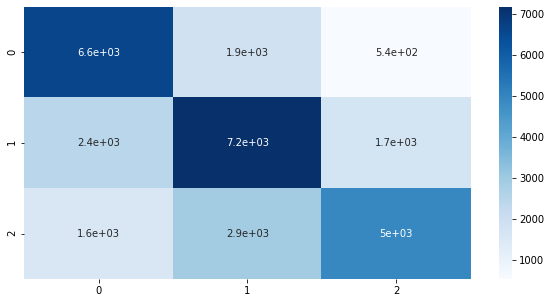

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap="Blues")

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.62      0.73      0.67      9077
           2       0.60      0.63      0.61     11360
           3       0.68      0.52      0.59      9453

    accuracy                           0.63     29890
   macro avg       0.64      0.63      0.63     29890
weighted avg       0.63      0.63      0.63     29890



In [ ]:
# We see the recall score for 1 and 3 is not so good because of class imbalance so do smote and making it balance.

**# BIAS AND VARIANCE ERROR - KNN**

In [ ]:
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(knn,x,y,cv=k,scoring="f1_weighted")

In [ ]:
scores

array([0.62571072, 0.62624682, 0.62229672, 0.62558498, 0.62692125])

In [ ]:
knn_bias_error=1-(np.mean(scores))
knn_bias_error

0.3746479018429134

In [ ]:
knn_variance_error=np.std(scores)
knn_variance_error

0.0015988094290499953

# **DECISION TREE**

In [ ]:
dt=DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
ypred_test=dt.predict(xtest)

In [ ]:
confusion_matrix(ytest,ypred_test)

array([[6355, 1735,  987],
       [1912, 6509, 2939],
       [1114, 2970, 5369]])

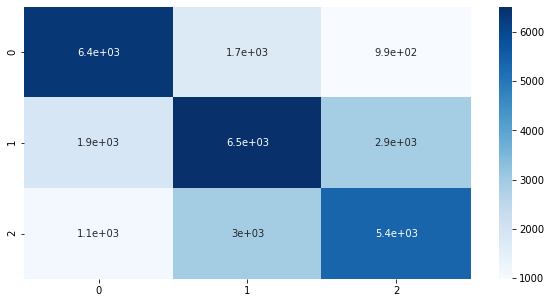

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap="Blues")

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.68      0.70      0.69      9077
           2       0.58      0.57      0.58     11360
           3       0.58      0.57      0.57      9453

    accuracy                           0.61     29890
   macro avg       0.61      0.61      0.61     29890
weighted avg       0.61      0.61      0.61     29890



# **FEATURE IMPORTANCE** 

In [ ]:
dt.feature_importances_

array([1.39173126e-01, 1.08221797e-01, 1.26184249e-01, 6.74783708e-02,
       8.50061872e-02, 4.95949984e-02, 3.29248835e-02, 1.16316793e-01,
       4.99187391e-02, 7.96074868e-02, 7.97338105e-02, 1.44240007e-02,
       9.34599358e-03, 1.66702799e-02, 5.07677475e-03, 5.75209177e-03,
       2.85902516e-03, 2.65833841e-03, 1.93645646e-03, 1.78496456e-03,
       1.20278845e-03, 1.27376903e-03, 1.28968446e-03, 1.31204882e-03,
       1.56576525e-04, 9.67654778e-05])

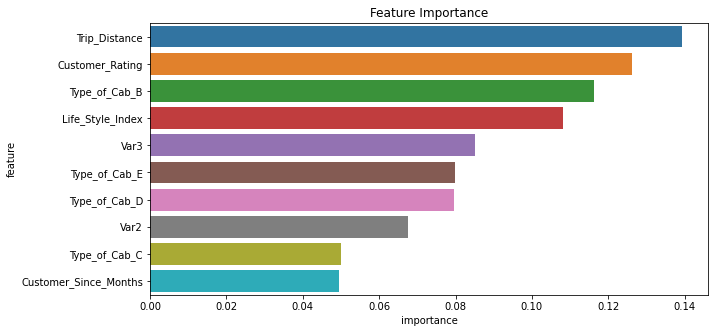

In [ ]:
# Let's turn this into a dataframe and visualize the most important features
importance_df = pd.DataFrame({'feature': xtrain.columns,'importance': dt.feature_importances_}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

In [ ]:
# bias and variance error

In [ ]:
dt=DecisionTreeClassifier(random_state=10)
k=KFold(n_splits=5,shuffle=True,random_state=True)
scores=cross_val_score(dt,x,y,cv=k,scoring="f1_weighted")

In [ ]:
scores

array([0.6106387 , 0.60781102, 0.60783095, 0.60271625, 0.60674981])

In [ ]:
dt_bias_error=1-(np.mean(scores))
dt_bias_error

0.3928506541454697

In [ ]:
dt_variance_error=np.std(scores)
dt_variance_error

0.0025647608125432698

# **`RANDOM FOREST`**

In [ ]:
rf=RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
ypred_test=rf.predict(xtest)
ypred_test

array([2, 2, 2, ..., 3, 1, 3])

In [ ]:
confusion_matrix(ytest,ypred_test)

array([[6499, 1955,  623],
       [ 529, 9239, 1592],
       [ 537, 3164, 5752]])

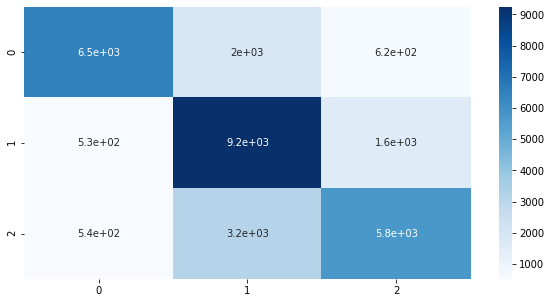

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap="Blues")
plt.show()

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.86      0.72      0.78      9077
           2       0.64      0.81      0.72     11360
           3       0.72      0.61      0.66      9453

    accuracy                           0.72     29890
   macro avg       0.74      0.71      0.72     29890
weighted avg       0.73      0.72      0.72     29890



# **FEATURE SELECTION**

In [ ]:
rf.feature_importances_

array([0.12727975, 0.10653404, 0.1209576 , 0.07572873, 0.09197539,
       0.05444606, 0.04412863, 0.09200971, 0.07603206, 0.0784106 ,
       0.03969374, 0.02577818, 0.01415746, 0.02296443, 0.00638943,
       0.00659408, 0.00341494, 0.00277303, 0.00226704, 0.002066  ,
       0.00165576, 0.00132796, 0.00142798, 0.00155012, 0.00022629,
       0.00021101])

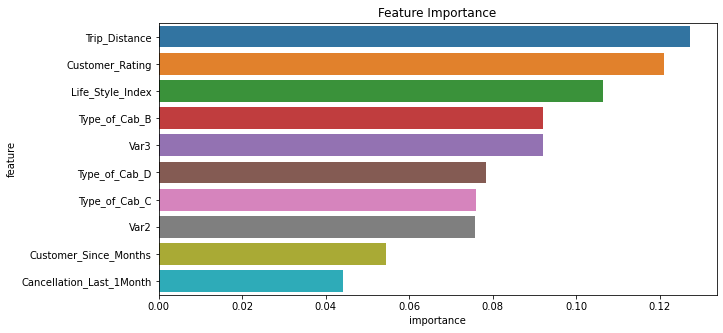

In [ ]:
# Let's turn this into a dataframe and visualize the most important features
importance_df = pd.DataFrame({'feature': xtrain.columns,'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

In [ ]:
# Bias and variance error

In [ ]:
rf=RandomForestClassifier(random_state=10)
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(rf,x,y,cv=k,scoring="f1_weighted")

In [ ]:
scores

array([0.7181104 , 0.71884019, 0.71456946, 0.71731152, 0.71526027])

In [ ]:
rf_bias_error=1-(np.mean(scores))
rf_bias_error

0.28318163100570704

In [ ]:
rf_variance_error=np.std(scores)
rf_variance_error

0.001642287935088865

# **ADA BOOSTING**

In [ ]:
ada_boost=AdaBoostClassifier(random_state=10)
ada_boost.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=10)

In [ ]:
ypred_test=ada_boost.predict(xtest)
ypred_test

array([1, 2, 2, ..., 1, 1, 3])

In [ ]:
confusion_matrix(ytest,ypred_test)

array([[6319, 2236,  522],
       [ 589, 8817, 1954],
       [ 646, 2944, 5863]])

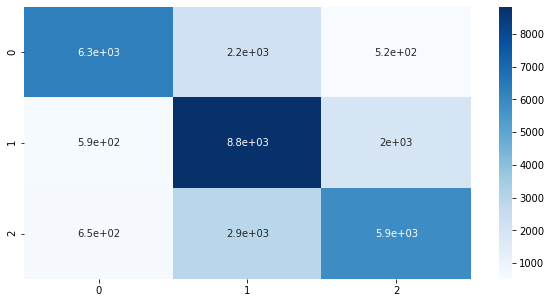

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap="Blues")
plt.show()

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.84      0.70      0.76      9077
           2       0.63      0.78      0.70     11360
           3       0.70      0.62      0.66      9453

    accuracy                           0.70     29890
   macro avg       0.72      0.70      0.70     29890
weighted avg       0.72      0.70      0.70     29890



In [ ]:
ada_boost.feature_importances_

array([0.1 , 0.04, 0.06, 0.  , 0.06, 0.  , 0.08, 0.08, 0.08, 0.08, 0.06,
       0.06, 0.08, 0.06, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.  , 0.  , 0.  , 0.  ])

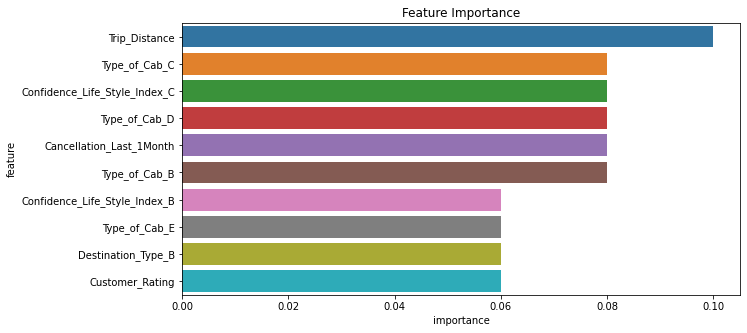

In [ ]:
importance_df = pd.DataFrame({'feature': xtrain.columns,'importance': ada_boost.feature_importances_}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

In [ ]:
# BIAS AND VARIANCE ERROR

In [ ]:
ada_boost=AdaBoostClassifier(random_state=10)
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(ada_boost,x,y,cv=k,scoring="f1_weighted")

In [ ]:
scores

array([0.70350758, 0.7009008 , 0.700826  , 0.70182014, 0.70251803])

In [ ]:
ab_bias_error=1-(np.mean(scores))
ab_bias_error

0.2980854898150319

In [ ]:
ab_variance_error=np.std(scores)
ab_variance_error

0.0010122725305081218

# **GRADIENT BOOSTING**

In [ ]:
gb=GradientBoostingClassifier(random_state=10)
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
ypred_test=gb.predict(xtest)
ypred_test

array([2, 2, 2, ..., 3, 1, 3])

In [ ]:
confusion_matrix(ytest,ypred_test)

array([[6413, 2130,  534],
       [ 447, 9588, 1325],
       [ 597, 3343, 5513]])

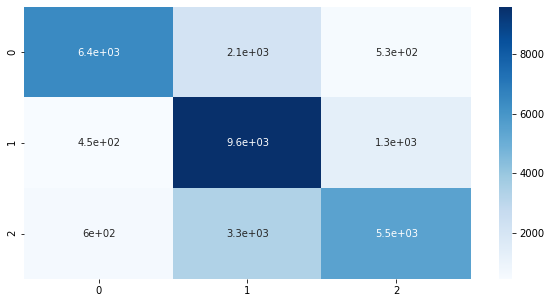

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap="Blues")
plt.show()

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.86      0.71      0.78      9077
           2       0.64      0.84      0.73     11360
           3       0.75      0.58      0.66      9453

    accuracy                           0.72     29890
   macro avg       0.75      0.71      0.72     29890
weighted avg       0.74      0.72      0.72     29890



In [ ]:
gb.feature_importances_

array([2.81563112e-02, 1.22014106e-02, 1.70581483e-02, 6.88284753e-04,
       7.91691194e-03, 5.41788833e-04, 6.81414891e-02, 2.20697542e-01,
       2.26427132e-01, 1.83115867e-01, 1.18317770e-01, 4.23167670e-02,
       1.33855483e-02, 4.95371247e-02, 7.14218773e-04, 6.24744405e-03,
       8.01472688e-04, 7.00337166e-04, 1.03393585e-03, 4.02015595e-04,
       8.16418099e-04, 3.11179427e-04, 1.74304995e-04, 2.18686016e-04,
       2.99315691e-05, 4.79599348e-05])

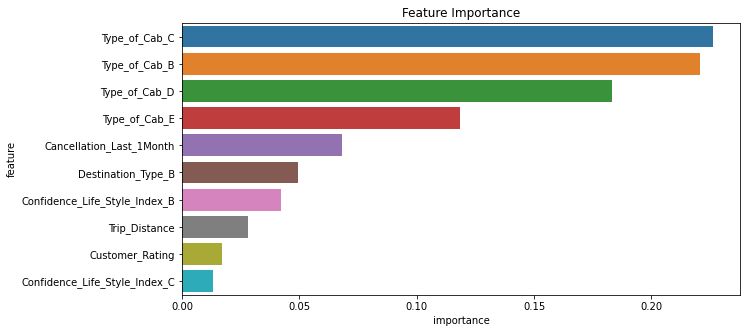

In [ ]:
importance_df = pd.DataFrame({'feature': xtrain.columns,'importance': gb.feature_importances_}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

In [ ]:
# BIAS AND VARIANCE ERROR

In [ ]:
gd_boost=GradientBoostingClassifier(random_state=10)
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(gd_boost,x,y,cv=k,scoring="f1_weighted")

In [ ]:
scores

array([0.71867357, 0.71726745, 0.71672688, 0.71949302, 0.71550504])

In [ ]:
gb_bias_error=1-(np.mean(scores))
gb_bias_error

0.2824668073683968

In [ ]:
gb_Variance_error=np.std(scores)
gb_Variance_error

0.0014124828423918775

# **XGBOOST**

In [ ]:
xg_boost=XGBClassifier()
xg_boost.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
ypred_test=xg_boost.predict(xtest)
ypred_test

array([2, 2, 2, ..., 1, 1, 2])

In [ ]:
confusion_matrix(ytest,ypred_test)

array([[6430, 2144,  503],
       [ 456, 9595, 1309],
       [ 654, 3365, 5434]])

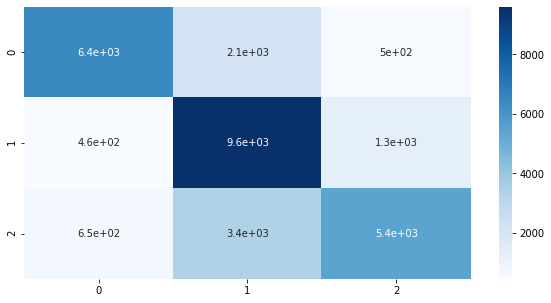

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap="Blues")
plt.show()

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.85      0.71      0.77      9077
           2       0.64      0.84      0.73     11360
           3       0.75      0.57      0.65      9453

    accuracy                           0.72     29890
   macro avg       0.75      0.71      0.72     29890
weighted avg       0.74      0.72      0.72     29890



In [ ]:
xg_boost.feature_importances_

array([0.01507479, 0.01409087, 0.01075006, 0.00137838, 0.00936574,
       0.00404332, 0.05176022, 0.12974447, 0.160851  , 0.25262308,
       0.160119  , 0.04788323, 0.04318295, 0.04710619, 0.01250853,
       0.01413712, 0.00703619, 0.00378388, 0.00417907, 0.00263896,
       0.00260127, 0.00173886, 0.00164479, 0.00175799, 0.        ,
       0.        ], dtype=float32)

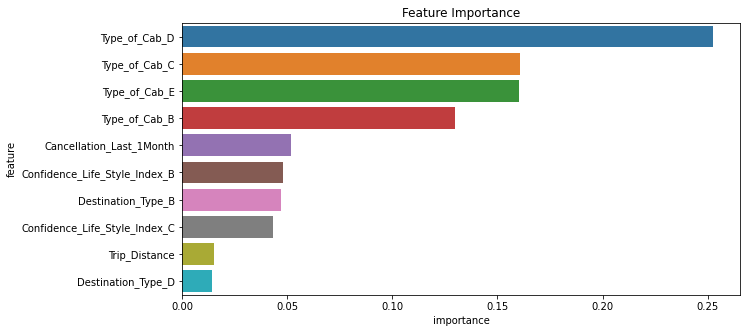

In [ ]:
importance_df = pd.DataFrame({'feature': xtrain.columns,'importance':xg_boost.feature_importances_}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

In [ ]:
# BIAS AND VARIANCE ERROR

In [ ]:
xg_boost=XGBClassifier()
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(xg_boost,x,y,cv=k,scoring="f1_weighted")

In [ ]:
scores

array([0.7164426 , 0.71195848, 0.71318228, 0.71553337, 0.71210113])

In [ ]:
xg_bias_error=1-(np.mean(scores))
xg_bias_error

0.286156428473738

In [ ]:
xg_variance_error=np.std(scores)
xg_variance_error

0.0018241338099743703

# **LIGHT XGBOOST**

In [ ]:
lgb=LGBMClassifier(random_state=10)
lgb.fit(xtrain,ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
ypred_test=lgb.predict(xtest)
ypred_test

array([2, 2, 2, ..., 3, 1, 2])

In [ ]:
confusion_matrix(ytest,ypred_test)

array([[6379, 2105,  593],
       [ 408, 9578, 1374],
       [ 479, 3276, 5698]])

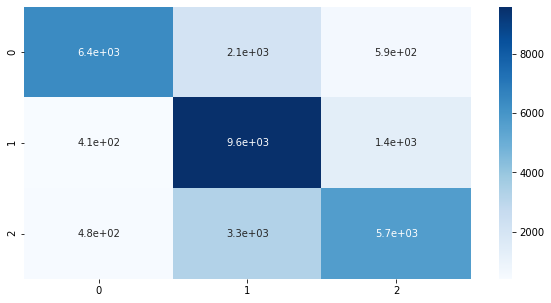

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap='Blues')
plt.show()

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78      9077
           2       0.64      0.84      0.73     11360
           3       0.74      0.60      0.67      9453

    accuracy                           0.72     29890
   macro avg       0.75      0.72      0.72     29890
weighted avg       0.75      0.72      0.72     29890



In [ ]:
lgb.feature_importances_

array([1467, 1088, 1189,  420,  780,  235,  709,  318,  383,  241,  187,
        334,  223,  408,   81,  277,   82,  114,   89,   71,   99,   67,
         46,   52,   18,   22])

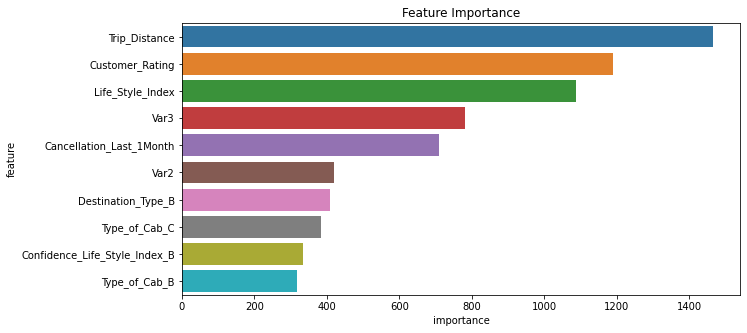

In [ ]:
importance_df = pd.DataFrame({'feature': xtrain.columns,'importance':lgb.feature_importances_}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

In [ ]:
# BIAS AND VARIANCE ERROR

In [ ]:
lgb=LGBMClassifier()

In [ ]:
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(lgb,x,y,cv=k,scoring="f1_weighted")

In [ ]:
scores

array([0.72423176, 0.72443722, 0.72185476, 0.7238966 , 0.72247685])

In [ ]:
lgb_bias_error=1-(np.mean(scores))
lgb_bias_error

0.27662056318737416

In [ ]:
lgb_variance_error=np.std(scores)
lgb_variance_error

0.0010249033405807608

In [ ]:
# LIGHT GRADIENT BOOSTING HAS LESS BIAS AND VARIANCE ERROR COMPARED TO OTHER MODELS
# SO BUILD THE FINAL MODEL WITH LIGHT XG BOOST WITH SOME HYPERTUNED PARAMETERS

## **Models using bagging , stacking and voting of best classifiers we got so far**

**The best models so far are:**
* Random Forest
* Gradient Boosting
* Xg Boost
* LGBM


## **Bagging Classifier** 

In [ ]:
bag = BaggingClassifier(base_estimator= lgb, n_estimators= 100)
bag.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                class_weight=None,
                                                colsample_bytree=1.0,
                                                importance_type='split',
                                                learning_rate=0.1, max_depth=-1,
                                                min_child_samples=20,
                                                min_child_weight=0.001,
                                                min_split_gain=0.0,
                                                n_estimators=100, n_jobs=-1,
                                                num_leaves=31, objective=None,
                                                random_state=None,
                                                reg_alpha=0.0, reg_lambda=0.0,
                                                silent=True, subsample=1.0,
                                                sub

In [ ]:
ypred_test=bag.predict(xtest)
ypred_test

array([2, 2, 2, ..., 3, 1, 2])

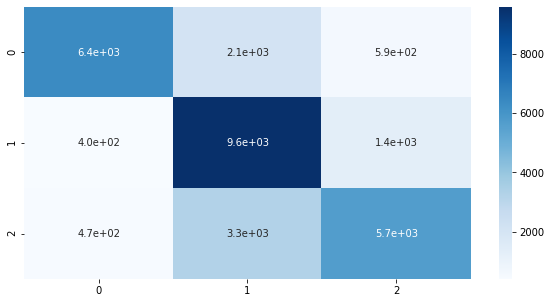

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap='Blues')
plt.show()

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78      9077
           2       0.64      0.84      0.73     11360
           3       0.74      0.60      0.67      9453

    accuracy                           0.73     29890
   macro avg       0.75      0.72      0.73     29890
weighted avg       0.75      0.73      0.72     29890



In [ ]:
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(bag,x,y,cv=k,scoring="f1_weighted")
scores

array([0.72521016, 0.72375958, 0.72181736, 0.72381143, 0.72187665])

In [ ]:
bag_bias_error=1-(np.mean(scores))
bag_bias_error

0.2767049651415343

In [ ]:
bag_variance_error=np.std(scores)
bag_variance_error

0.0012919356435117388

## **Stacking Classifier**

In [ ]:
est = [('Random Forest',rf),('Gradient Boosting',gb),('XG Boost',xg_boost),('LGBM',lgb)]
stack = StackingClassifier(estimators=est,cv=5,final_estimator=lgb)
stack.fit(xtrain,ytrain)

StackingClassifier(cv=5,
                   estimators=[('Random Forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                             

In [ ]:
ypred_test=bag.predict(xtest)
ypred_test

array([2, 2, 2, ..., 3, 1, 2])

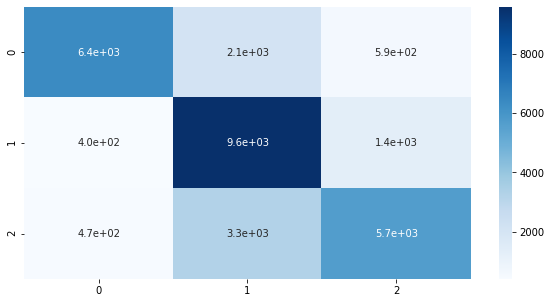

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap='Blues')
plt.show()

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78      9077
           2       0.64      0.84      0.73     11360
           3       0.74      0.60      0.67      9453

    accuracy                           0.73     29890
   macro avg       0.75      0.72      0.73     29890
weighted avg       0.75      0.73      0.72     29890



In [ ]:
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(bag,x,y,cv=k,scoring="f1_weighted")
scores

array([0.72488909, 0.72421262, 0.72199504, 0.72384759, 0.72174329])

In [ ]:
stack_bias_error=1-(np.mean(scores))
stack_bias_error

0.2766624749098894

In [ ]:
stack_variance_error=np.std(scores)
stack_variance_error

0.0012471713415767264

## **Voting Classifier**

In [ ]:
vote = VotingClassifier(estimators=est)
vote.fit(xtrain,ytrain)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.

In [ ]:
ypred_test=bag.predict(xtest)
ypred_test

array([2, 2, 2, ..., 3, 1, 2])

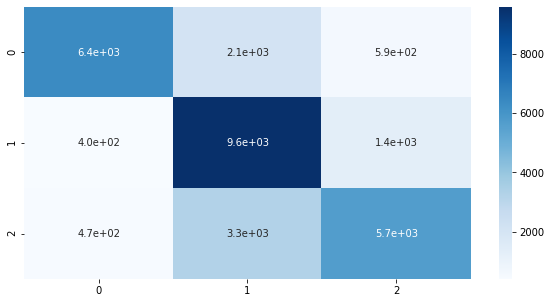

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred_test),annot=True,cmap='Blues')
plt.show()

In [ ]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78      9077
           2       0.64      0.84      0.73     11360
           3       0.74      0.60      0.67      9453

    accuracy                           0.73     29890
   macro avg       0.75      0.72      0.73     29890
weighted avg       0.75      0.73      0.72     29890



In [ ]:
k=KFold(n_splits=5,shuffle=True,random_state=10)
scores=cross_val_score(bag,x,y,cv=k,scoring="f1_weighted")
scores

array([0.72455895, 0.72386841, 0.72152371, 0.72377252, 0.72206611])

In [ ]:
vote_bias_error=1-(np.mean(scores))
vote_bias_error

0.2768420610334472

In [ ]:
vote_variance_error=np.std(scores)
vote_variance_error

0.001158284926309763

In [ ]:
res=pd.DataFrame({"Model":["KNN","DECISION TREE","RANDOM FOREST","ADABOOST","GRADIENTBOOST","XGBOOST","LGB BOOST"],
             "Bias_error":[knn_bias_error,dt_bias_error,rf_bias_error,ab_bias_error,gb_bias_error,xg_bias_error,lgb_bias_error,bag_bias_error,stack_bias_error,vote_bias_error],
             "Variance_error":[knn_variance_error,dt_variance_error,rf_variance_error,ab_variance_error,gb_Variance_error,xg_variance_error,lgb_variance_error,bag_variance_error,stack_variance_error,vote_variance_error]})

ValueError: ignored

In [ ]:
res

**The maximum f1_weighted score is 0.72 and multiple models are giving that score.**

The models f1_weighted score summary:

1. KNN - 0.62

2. Decision Tree - 0.60

3. Random Forest - 0.72

4. Adaptive Boost - 0.70

4. Gradient Boost - 0.72

5. Xg Boost - 0.72

6. LGBM - 0.72

7. Bagging Classifier - 0.72

8. Stacking Classifier  - 0.72

9. Voting Classifier - 0.72